In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd/content/drive/My Drive/Python Collabs/Data Analytics with Python and R Checkpoint

/content/drive/My Drive/Python Collabs/Data Analytics with Python and R Checkpoint


**Import Libraries**

In [4]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import datetime
import scipy.stats as stats

**Load Data**

In [5]:
df = pd.read_csv('CleanCreditScoring.csv', sep=',')

In [6]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"


Show the data frame Infos

In [7]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

There are no missing values the data is clean

In [8]:
df.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


Conclusion: 
The Income feature is random and showing outliers wich has been replaced by the mean value, the plots shows no regular pattern and data has been monitored and treated for further processing

**Analyzing INCOME feature**

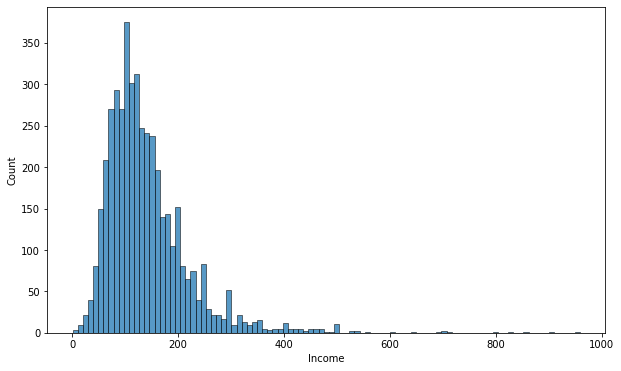

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['Income'])

The histogram plot shows a shape of a normal distribution "except" outliers in the right side

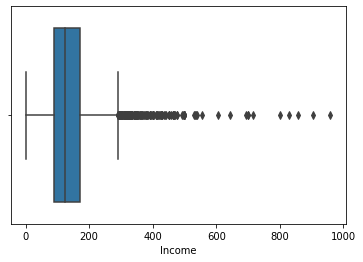

In [10]:
sns.boxplot(x=df['Income'])

Outliers are shown clearly here

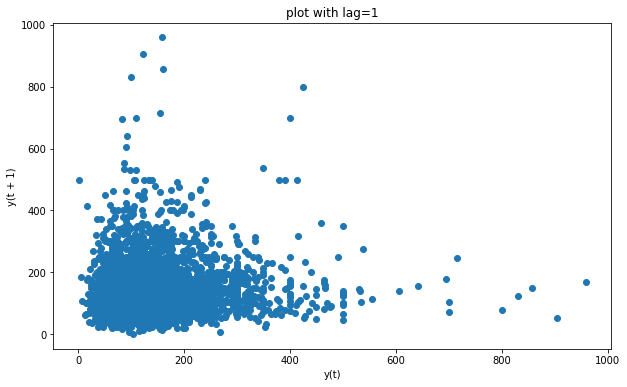

In [11]:
plt.figure(figsize=(10,6))
pd.plotting.lag_plot(df['Income'],lag=1)
plt.title('plot with lag=1')
plt.show()

the plot shows a random pattern

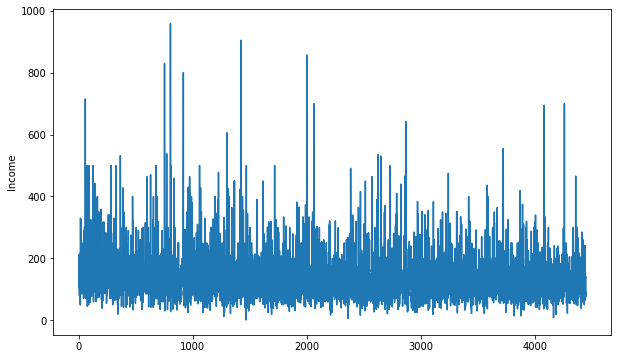

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df['Income'])

no fixed location no fixed variation

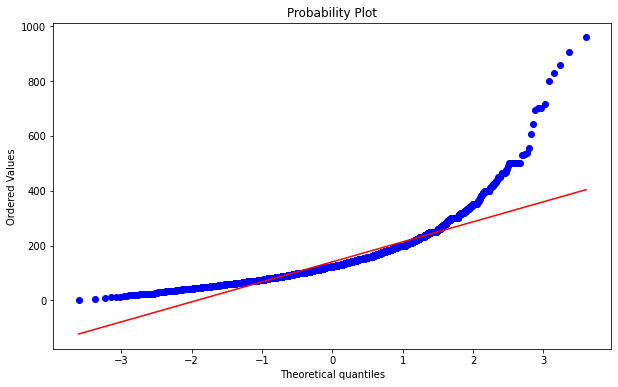

In [13]:
plt.figure(figsize=(10,6))
st.probplot(df['Income'],plot=plt)
plt.show()

the normal probability plot shows that at the edges the reel values are greater than theoretical values and this pattern is more obvious in the max outliers (at the right)

In [14]:
ot=df.describe()
c='Income'
max=(ot.loc['75%',c])+(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
min=(ot.loc['25%',c])-(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
print(max,min)

def outlier_replacer_funct(df,c,max,min):
  for i in range(0,len(df[c])):
    if df[c][i]<min or df[c][i]>max:
       df[c][i]=np.nan

290.0 -30.0


In [15]:
df1=df.copy()
outlier_replacer_funct(df1,c,max,min)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
df1.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4226.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,128.170611,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,54.530717,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,88.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,160.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,290.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


In [17]:
df1.isnull().sum()

Status          0
Seniority       0
Home            0
Time            0
Age             0
Marital         0
Records         0
Job             0
Expenses        0
Income        220
Assets          0
Debt            0
Amount          0
Price           0
Finrat          0
Savings         0
seniorityR      0
timeR           0
ageR            0
expensesR       0
incomeR         0
assetsR         0
debtR           0
amountR         0
priceR          0
finratR         0
savingsR        0
dtype: int64

After applying the function we have 220 value of outliers replaced by np.nan
We will replace the voided values by the mean since the distribution is normal

In [18]:
for i in range(0,len(df1['Income'])):
     if not df1['Income'][i]<1000000:
      df1['Income'][i]=df['Income'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


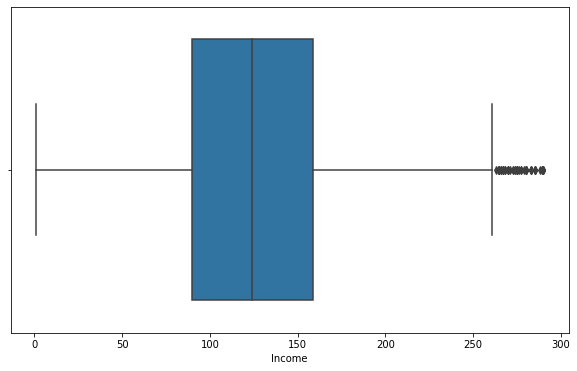

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['Income'],data=df1)

In [20]:
list_columns=df1.columns.values.tolist()
list_columns

['Status',
 'Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings',
 'seniorityR',
 'timeR',
 'ageR',
 'expensesR',
 'incomeR',
 'assetsR',
 'debtR',
 'amountR',
 'priceR',
 'finratR',
 'savingsR']

**Conclusion on the 'Income' feature**

The income feature is random and the distribution has a normal shape
Outliers above the max value have 'weight' in the global data
after replacing them with mean the whole mean of the new data frame moved normaly to the left and new outliers have been reamrked but their effect have been reduced wich will help to treat exploit data next

**Analyzing AMOUNT feature**

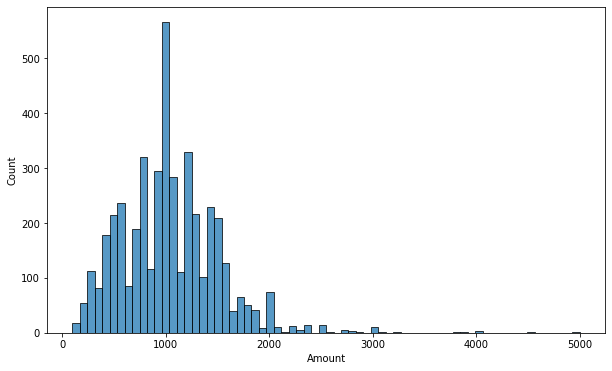

In [21]:
plt.figure(figsize=[10,6])
sns.histplot(df1['Amount'])

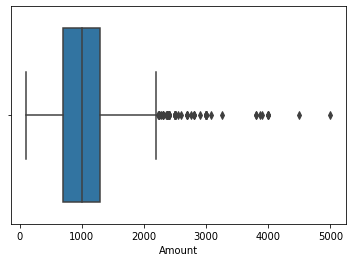

In [22]:
sns.boxplot(x=df1['Amount'])

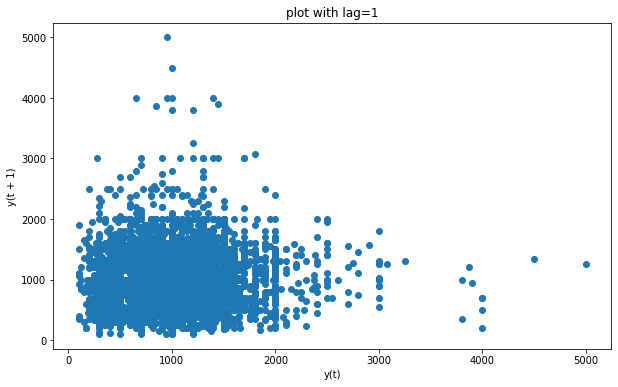

In [23]:
plt.figure(figsize=(10,6))
pd.plotting.lag_plot(df1['Amount'],lag=1)
plt.title('plot with lag=1')
plt.show()

The plot shows a random pattern

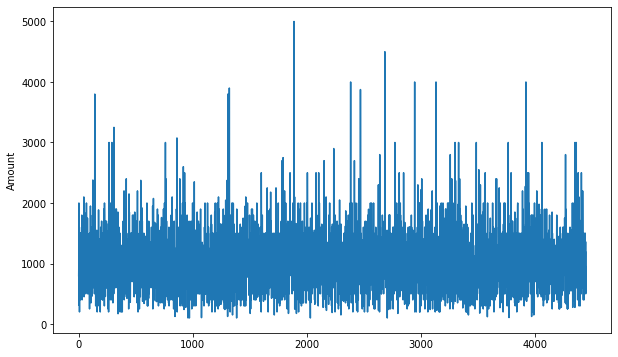

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df1['Amount'])

There are no fixed location or variation

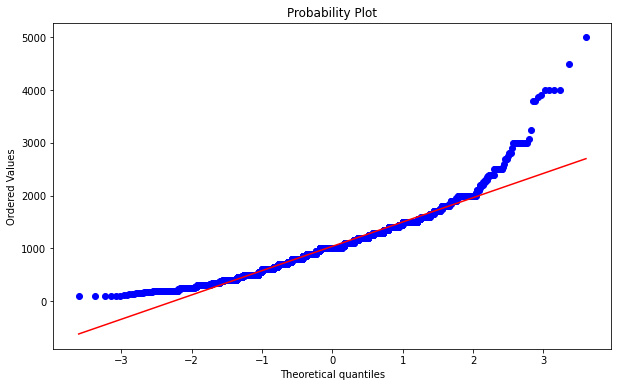

In [25]:
plt.figure(figsize=(10,6))
st.probplot(df1['Amount'],plot=plt)
plt.show()

The probability plot shows that the real values are greater than theoritical values near the maximum values

In [26]:
df2=df1.copy()
ot1=df2.describe()
c1='Amount'
max1=(ot1.loc['75%',c1])+(1.5*((ot1.loc['75%',c1])-(ot1.loc['25%',c1])))
min1=(ot1.loc['25%',c1])-(1.5*((ot1.loc['75%',c1])-(ot1.loc['25%',c1])))
print(max1,min1)

2200.0 -200.0


In [27]:
outlier_replacer_funct(df2,c1,max1,min1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
df2.isnull().sum()

Status         0
Seniority      0
Home           0
Time           0
Age            0
Marital        0
Records        0
Job            0
Expenses       0
Income         0
Assets         0
Debt           0
Amount        72
Price          0
Finrat         0
Savings        0
seniorityR     0
timeR          0
ageR           0
expensesR      0
incomeR        0
assetsR        0
debtR          0
amountR        0
priceR         0
finratR        0
savingsR       0
dtype: int64

In [29]:
for i in range(0,len(df2['Amount'])):
     if not df2['Amount'][i]<1000000:
      df2['Amount'][i]=df['Amount'].mean()

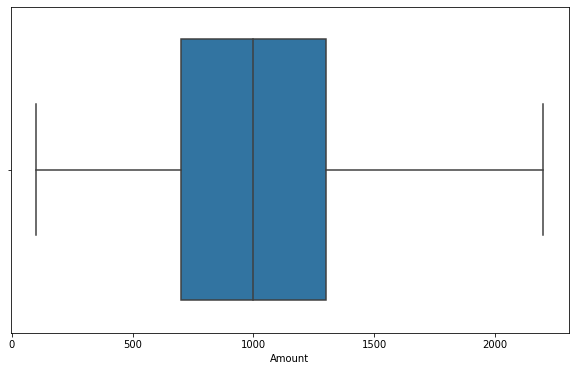

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df2['Amount'])

**Conclusion on 'Amount' Feature**

The distribution of 'Amount' feature is normal, and the data is radnom.
the outliers above the maximum value are less 'Intense' than the previous feature
It took one iterative action of replacing outliers by the mean to remove them and that's obvious in the above boxplot.

**Data Transformation part**

In [31]:
list_columns

['Status',
 'Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings',
 'seniorityR',
 'timeR',
 'ageR',
 'expensesR',
 'incomeR',
 'assetsR',
 'debtR',
 'amountR',
 'priceR',
 'finratR',
 'savingsR']

In [32]:
for i in range(0,len(df2.columns)):
  if type(df2.loc[0,df2.columns[i]])==str:
   print(df2.columns[i],df2[df2.columns[i]].unique())

Status ['good' 'bad']
Home ['rent' 'owner' 'parents' 'priv' 'other' 'ignore']
Marital ['married' 'widow' 'single' 'separated' 'divorced']
Records ['no_rec' 'yes_rec']
Job ['freelance' 'fixed' 'partime' 'others']
seniorityR ['sen (8,14]' 'sen (14,99]' 'sen (-1,1]' 'sen (3,8]' 'sen (1,3]']
timeR ['time (48,99]' 'time (24,36]' 'time (0,12]' 'time (36,48]' 'time (12,24]']
ageR ['age (25,30]' 'age (50,99]' 'age (40,50]' 'age (0,25]' 'age (30,40]']
expensesR ['exp (60,80]' 'exp (40,50]' 'exp (80,1e+04]' 'exp (0,40]' 'exp (50,60]']
incomeR ['inc (110,140]' 'inc (190,1e+04]' 'inc (140,190]' 'inc (80,110]'
 'inc (0,80]']
assetsR ['asset (-1,0]' 'asset (0,3e+03]' 'asset (3e+03,5e+03]'
 'asset (8e+03,1e+06]' 'asset (5e+03,8e+03]']
debtR ['debt (-1,0]' 'debt (1.5e+03,2.5e+03]' 'debt (0,500]'
 'debt (2.5e+03,1e+06]' 'debt (500,1.5e+03]']
amountR ['am (600,900]' 'am (900,1.1e+03]' 'am (1.4e+03,1e+05]' 'am (0,600]'
 'am (1.1e+03,1.4e+03]']
priceR ['priz (0,1e+03]' 'priz (1.5e+03,1.8e+03]' 'priz (1.8e

visualizing each categoric data

In [33]:
df3=df2.copy()
from sklearn.preprocessing import LabelEncoder           
encoder=LabelEncoder()
for i in range(0,len(df3.columns)):                                  #This loop is for transforming all the 'categoric' features
  if (type(df3.loc[0,df3.columns[i]])==str):
      df3[df3.columns[i]]=encoder.fit_transform(df[df.columns[i]])

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   int64  
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   int64  
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   int64  
 6   Records     4446 non-null   int64  
 7   Job         4446 non-null   int64  
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   float64
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   float64
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   int64  
 17  timeR       4446 non-null   int64  
 18  ageR        4446 non-null   int64  
 19  expensesR   4446 non-null  

Computing the R correlation coefficient

In [35]:
R=np.corrcoef(df2['Income'],df2['Amount'])
print(R)

[[1.         0.18077042]
 [0.18077042 1.        ]]


In [36]:
Y=np.array(df2['Amount']).reshape(-1,1)
print(Y)

[[ 800.]
 [1000.]
 [2000.]
 ...
 [ 500.]
 [ 550.]
 [1350.]]


In [37]:
X=np.array(df2['Income']).reshape(-1,1)
Y=np.array(df2['Amount']).reshape(-1,1)

In [38]:
model = LinearRegression().fit(X,Y)
r_sq = model.score(X,Y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coef:', model.coef_)

coefficient of determination: 0.032677944642066636
intercept: [830.57946528]
coef: [[1.39547508]]


The expression of the regression is : 
Amount = 1.39547508 * Income + 830.57946528

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   float64
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   float64
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

In [40]:
list_num_data=[]
list_categ_data=[]
feat_num={}
feat_categ={}
for i in range(0,len(df2.columns)):                                  #This loop is for extracting numerical features and categoric features separated and by indexes
  if not (type(df2.loc[0,df2.columns[i]])==str):
      list_num_data.append(df2.columns[i])
      feat_num[i] = df2.columns[i]                                  
  else:
      list_categ_data.append(df2.columns[i])
      feat_categ[i]= df2.columns[i] 

features_num=list_num_data
features_categ=list_categ_data
feat_num

{1: 'Seniority',
 3: 'Time',
 4: 'Age',
 8: 'Expenses',
 9: 'Income',
 10: 'Assets',
 11: 'Debt',
 12: 'Amount',
 13: 'Price',
 14: 'Finrat',
 15: 'Savings'}

In [41]:
feat_categ

{0: 'Status',
 2: 'Home',
 5: 'Marital',
 6: 'Records',
 7: 'Job',
 16: 'seniorityR',
 17: 'timeR',
 18: 'ageR',
 19: 'expensesR',
 20: 'incomeR',
 21: 'assetsR',
 22: 'debtR',
 23: 'amountR',
 24: 'priceR',
 25: 'finratR',
 26: 'savingsR'}

In [42]:
# extracting out the features
x = df2.loc[:, features_num].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized
x_standardized

array([[ 0.12336287,  0.92491136, -0.64488271, ..., -0.98090001,
         1.0764133 ,  0.09123144],
       [ 1.10190227,  0.92491136,  1.90401744, ...,  0.31109689,
        -0.6034234 ,  0.30057838],
       [ 0.2456803 , -0.71372418,  0.81163166, ...,  2.42252532,
        -0.27538999, -0.50460215],
       ...,
       [-0.97749395, -1.53304195, -0.00765768, ..., -0.79473789,
        -1.01505902, -0.64953465],
       [-0.97749395,  0.10559359, -1.28210775, ..., -1.45187425,
         1.34310311,  1.09551117],
       [-0.36590683,  0.92491136, -0.46281842, ...,  0.29836786,
         0.45132611, -0.20101927]])

In [43]:
b=df2.columns.values.tolist()
feat_dict = {x: b[x] for x in range(len(b))}
feat_dict

{0: 'Status',
 1: 'Seniority',
 2: 'Home',
 3: 'Time',
 4: 'Age',
 5: 'Marital',
 6: 'Records',
 7: 'Job',
 8: 'Expenses',
 9: 'Income',
 10: 'Assets',
 11: 'Debt',
 12: 'Amount',
 13: 'Price',
 14: 'Finrat',
 15: 'Savings',
 16: 'seniorityR',
 17: 'timeR',
 18: 'ageR',
 19: 'expensesR',
 20: 'incomeR',
 21: 'assetsR',
 22: 'debtR',
 23: 'amountR',
 24: 'priceR',
 25: 'finratR',
 26: 'savingsR'}

**Reconstruction of the DataFrame to compute covariance matrix**

In [44]:
empty_df=np.empty(shape=(4446,27))
empty_df_num=np.empty(shape=(4446,11))

In [45]:
po_num=list(feat_num.keys())
j=0                                                         
for i in po_num:
    empty_df[:,i]=x_standardized[:,j]                       # placing numeric standarsized features first in the empty array (empty_df)
    j=j+1      

In [59]:
features_categ

['Status',
 'Home',
 'Marital',
 'Records',
 'Job',
 'seniorityR',
 'timeR',
 'ageR',
 'expensesR',
 'incomeR',
 'assetsR',
 'debtR',
 'amountR',
 'priceR',
 'finratR',
 'savingsR']

In [47]:
po_categ=list(feat_categ.keys())
j=0
for i in po_categ:                                          # placing categoric transformed features in the empty array
   empty_df[:,i]=df3.loc[:, features_categ[j]].values
   j=j+1

**Computing Covariance Matrix**

In [48]:
cov_data = np.corrcoef(x_standardized.T)
cov_data

array([[ 1.        , -0.02187363,  0.50608874,  0.12568047,  0.14303679,
         0.12424073, -0.01934661, -0.00870817,  0.04112198, -0.07339167,
         0.09324557],
       [-0.02187363,  1.        , -0.05184996, -0.00171714,  0.02427124,
        -0.0830177 ,  0.05826747,  0.50575894,  0.12967683,  0.46864134,
         0.10165326],
       [ 0.50608874, -0.05184996,  1.        ,  0.24813694,  0.13424289,
         0.18098586, -0.04618789,  0.00884214,  0.04868519, -0.03451424,
         0.06203607],
       [ 0.12568047, -0.00171714,  0.24813694,  1.        ,  0.21482587,
         0.01893457,  0.01477083,  0.05168576,  0.04072803,  0.02458219,
        -0.03809391],
       [ 0.14303679,  0.02427124,  0.13424289,  0.21482587,  1.        ,
         0.12208159,  0.11451711,  0.18077042,  0.16889894,  0.02608216,
         0.57513018],
       [ 0.12424073, -0.0830177 ,  0.18098586,  0.01893457,  0.12208159,
         1.        ,  0.19161949,  0.08267155,  0.19489363, -0.02505999,
         0.067

**Plotting covariance matrix**

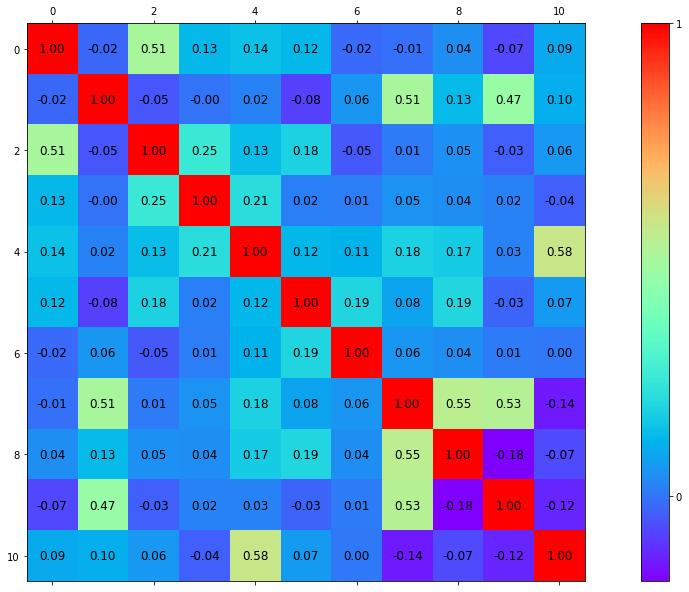

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
img = plt.matshow(cov_data,fignum=1, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

The most Strong correlations are between features :
1&3 (Seniority-Age)  : 0.51
2&8 (Time-Amount)    : 0.51
2&9  (Time-Price)    : 0.47
5&11 (Income-Savings): 0.58
8&9  (Amount-Price)  : 0.55
8&10 (Amount-Finrat) : 0.53

In [50]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_data)
eigen_vals


h=features_num                                                                    # extract the features names and putting it onto a list
feat_dict2 = {h[x]: eigen_vals[x] for x in range(len(eigen_vals))}                # Making a dictionnary : The Keys are the features and values are the eigenvals

dict1 = feat_dict2                                                                # Sorting the dictionary prior to eigenvals and keep features on index to better 
sorted_dict = {}                                                                  # Visualization later and know every couple (eigenval,feature) for the PCA choose
sorted_keys = sorted(feat_dict2, key=feat_dict2.get, reverse=True) 

for w in sorted_keys:
    sorted_dict[w] = feat_dict2[w]

sorted_dict

{'Seniority': 2.1610130290700442,
 'Time': 1.9579874945391023,
 'Age': 1.3912440815301057,
 'Expenses': 1.3006454608078497,
 'Savings': 1.0542743544071518,
 'Finrat': 0.9580073152254115,
 'Price': 0.7660915687874689,
 'Amount': 0.5695999339305046,
 'Debt': 0.4678726135346742,
 'Assets': 0.23504586028328808,
 'Income': 0.1382182878843888}

In [51]:
eigen_vecs

array([[-7.29505487e-02,  4.35902394e-01,  3.19913802e-01,
         2.54398778e-01,  1.60185585e-02, -5.73019070e-02,
        -6.21130513e-01,  1.42461148e-01, -3.34612511e-01,
        -3.38764708e-01,  3.51892858e-02],
       [-4.68190069e-01, -2.08779177e-01, -1.31224068e-01,
         2.25801160e-01,  4.89020725e-02,  3.90893733e-01,
        -3.12333805e-02, -6.53469043e-01, -2.44809079e-01,
        -1.59612560e-01,  2.02263011e-02],
       [-9.16008510e-02,  4.51407956e-01,  3.91525271e-01,
         2.69613680e-01, -6.73380393e-04,  3.88092326e-02,
         7.31012474e-01, -2.56470470e-02, -3.51831796e-02,
        -1.44232927e-01,  5.72010018e-02],
       [-1.23516693e-01,  2.49970958e-01,  1.94017689e-01,
         2.14912133e-01, -1.51526819e-02, -1.61549782e-01,
        -1.85755576e-01, -2.89385562e-01,  1.13874480e-01,
         8.25124749e-01, -7.26194717e-03],
       [-2.52407897e-01,  4.21349677e-01, -4.59666563e-01,
         5.69035015e-03,  5.61426065e-02,  5.71191996e-01,
  

**PCA Selection**

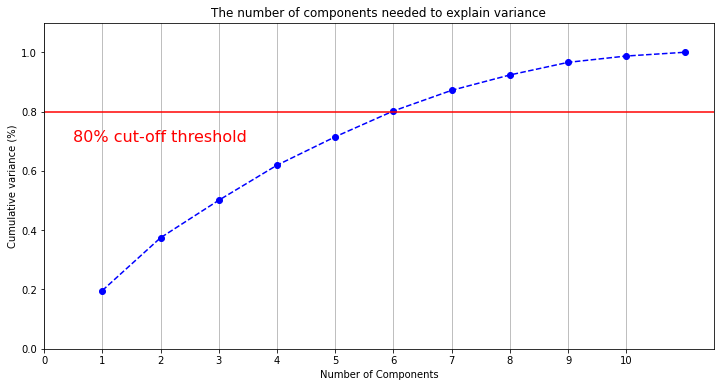

In [52]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_standardized)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

6 keys features are necessary to explain 80% of variance of the dataframe
'Seniority': 2.1610130290700442,
 'Time': 1.9579874945391023,
 'Age': 1.3912440815301057,
 'Expenses': 1.3006454608078497,
 'Savings': 1.0542743544071518,
 'Finrat': 0.9580073152254115,

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=df3, columns= ['Seniority','Time','Age','Expenses','Savings','Finrat'])
principalDF

,Seniority,Time,Age,Expenses,Savings,Finrat
0,9,60,30,73,4.200000,94.562648
1,17,60,58,48,4.980000,60.313631
2,10,36,46,90,1.980000,67.001675
3,0,60,24,63,7.933333,67.924528
4,0,36,26,46,7.083871,34.065934
...,...,...,...,...,...,...
4441,1,60,39,69,1.533333,88.235294
4442,22,60,46,60,0.568421,75.217736
4443,0,24,37,60,1.440000,51.921080
4444,0,48,23,49,7.941818,100.000000


In [54]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import prince

In [56]:
data1=df2.loc[:,features_categ].values
data2=pd.DataFrame(data1,columns=features_categ)                       #MCA works on dataframe so i convert data1 from np.array to df
data2

mca = prince.MCA(n_components=2, n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(data2)
mca

MCA(n_iter=3, random_state=42)

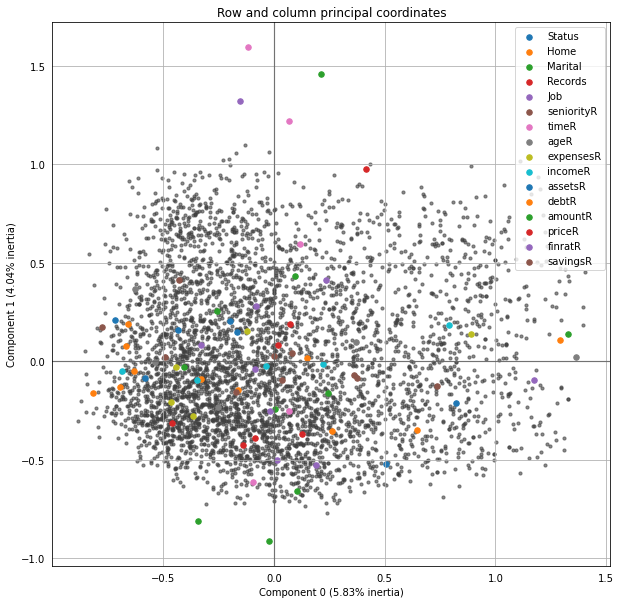

In [57]:
ax = mca.plot_coordinates( X=data2,
ax=None,figsize=(10, 10),
show_row_points=True,
row_points_size=10,
show_row_labels=False,
show_column_points=True,
column_points_size=30,
show_column_labels=False,
legend_n_cols=1 )